# Mini Project on Descriptive Analytics using file handling 

1. **Descriptive Analysis**

`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

`Identify the top 10 most-rated movies`


2. **Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

3. **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


4. **Rating Distribution by Demographics**

`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

`Are there specific genres preferred by certain age groups or occupations?`


5. **Top Performers**

`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`


6. **Exploring Long Tail**

`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`


7. **Tag Analysis**

`Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`

## You can do for self learning

8. **Visualization Projects**

`Create dashboards to visualize:`

`The distribution of ratings by genres and years.`

`Popular genres by user demographics.`

`Heatmaps showing the correlation between genres, user activity, and ratings`

In [5]:
# First Solution - Descriptive Analysys

ratings = open(r"C:\Users\kamle\Desktop\ml-1m\ratings.dat")
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} : {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r"C:\Users\kamle\Desktop\ml-1m\movies.dat")
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId]," : ", count)

High : 22
Medium : 61
Low : 16
American Beauty (1999)  :  3428
Star Wars: Episode IV - A New Hope (1977)  :  2991
Star Wars: Episode V - The Empire Strikes Back (1980)  :  2990
Star Wars: Episode VI - Return of the Jedi (1983)  :  2883
Jurassic Park (1993)  :  2672
Saving Private Ryan (1998)  :  2653
Terminator 2: Judgment Day (1991)  :  2649
Matrix, The (1999)  :  2590
Back to the Future (1985)  :  2583
Silence of the Lambs, The (1991)  :  2578


In [2]:
# Genre Insights

ratings_file_path = r"C:\Users\kamle\Desktop\ml-1m\ratings.dat"
movies_file_path = r"C:\Users\kamle\Desktop\ml-1m\movies.dat"

genre_rating_count = dict() 
genre_frequency = dict()     
movie_genre_map = dict()     

# mapping MovieID to genres
with open(movies_file_path, 'r') as movies_file:
    for line in movies_file:
        line = line.strip()
        columns = line.split('::')
        movie_id = int(columns[0])
        genres = columns[2].split('|')  
        movie_genre_map[movie_id] = genres

# Agregating MovieID to rating and genre
with open(ratings_file_path, 'r') as ratings_file:
    for line in ratings_file:
        line = line.strip()
        columns = list(map(int, line.split('::')))
        movie_id = columns[1]
        rating = columns[2]

        if movie_id in movie_genre_map:
            genres = movie_genre_map[movie_id]

            for genre in genres:
                if genre not in genre_rating_count:
                    genre_rating_count[genre] = {'sum': 0, 'count': 0}
                genre_rating_count[genre]['sum'] += rating
                genre_rating_count[genre]['count'] += 1

                if genre not in genre_frequency:
                    genre_frequency[genre] = 0
                genre_frequency[genre] += 1

# average ratings for each genre
genre_avg_ratings = {
    genre: data['sum'] / data['count']
    for genre, data in genre_rating_count.items()
}

# format
print("Most Frequently Rated Genres:")
for genre, count in sorted(genre_frequency.items(), key=lambda x: x[1], reverse=True):
    print(f"{genre}: {count} ratings")

print("\nAverage Ratings by Genre:")
for genre, avg_rating in sorted(genre_avg_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"{genre}: {avg_rating:.2f}")


Most Frequently Rated Genres:
Comedy: 356580 ratings
Drama: 354529 ratings
Action: 257457 ratings
Thriller: 189680 ratings
Sci-Fi: 157294 ratings
Romance: 147523 ratings
Adventure: 133953 ratings
Crime: 79541 ratings
Horror: 76386 ratings
Children's: 72186 ratings
War: 68527 ratings
Animation: 43293 ratings
Musical: 41533 ratings
Mystery: 40178 ratings
Fantasy: 36301 ratings
Western: 20683 ratings
Film-Noir: 18261 ratings
Documentary: 7910 ratings

Average Ratings by Genre:
Film-Noir: 4.08
Documentary: 3.93
War: 3.89
Drama: 3.77
Crime: 3.71
Animation: 3.68
Mystery: 3.67
Musical: 3.67
Western: 3.64
Romance: 3.61
Thriller: 3.57
Comedy: 3.52
Action: 3.49
Adventure: 3.48
Sci-Fi: 3.47
Fantasy: 3.45
Children's: 3.42
Horror: 3.22


In [9]:
# User Engagement Analysis
#1)Identify the most active users (profession) based on the number of ratings they’ve given.
User_info = open(r"C:\Users\kamle\Desktop\ml-1m\users.dat")
ratings_file= open(r"C:\Users\kamle\Desktop\ml-1m\ratings.dat")

user_rating_count=dict()
user_profession=dict()
profession_rating=dict()

for line in ratings_file:
    line=line.strip()
    column=list(map(int,line.split("::")))
    user_id=column[0]
    
    if(user_id not in user_rating_count):
        user_rating_count[user_id]=0
    user_rating_count[user_id]+=1
    
for line in User_info:
    line=line.strip()
    column=line.split('::')
    user_id=int(column[0])
    profession=column[3]
    user_profession[user_id]=profession
    
for user_id,rating in user_rating_count.items():
    if user_id in user_profession:
        profession=user_profession[user_id]
        if profession not in profession_rating:
            profession_rating[profession]=0
        profession_rating[profession]+=rating

print("Active Professions based on rating: ")
sorted_p=sorted(profession_rating.items(),key=lambda x : x[1],reverse=True)
for profession_nm ,rating_t in sorted_p:
    print(f'{profession_nm}:{rating_t} ratings ')
        
#Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.    
    
    # File paths
users_file_path = r"C:\Users\kamle\Desktop\ml-1m\users.dat"
ratings_file_path = r"C:\Users\kamle\Desktop\ml-1m\ratings.dat"
movies_file_path = r"C:\Users\kamle\Desktop\ml-1m\movies.dat"

# Initialize dictionaries to store data
user_data = {}  # {UserID: {"Gender": ..., "Age": ..., "Occupation": ...}}
movie_genres = {}  # {MovieID: [Genre1, Genre2, ...]}
genre_stats_by_gender = {}  # {Genre: {"M": {"Total_Ratings": ..., "Sum_Ratings": ...}, "F": {...}}}
genre_stats_by_age = {}  # {Genre: {Age: {"Total_Ratings": ..., "Sum_Ratings": ...}}}
genre_stats_by_occupation = {}  # {Genre: {Occupation: {"Total_Ratings": ..., "Sum_Ratings": ...}}}

with open(users_file_path, "r") as users_file:
    for line in users_file:
        user_id, gender, age, occupation, _ = line.strip().split("::")
        user_data[int(user_id)] = {"Gender": gender, "Age": int(age), "Occupation": int(occupation)}

with open(movies_file_path, "r") as movies_file:
    for line in movies_file:
        movie_id, _, genres = line.strip().split("::")
        movie_genres[int(movie_id)] = genres.split("|")

with open(ratings_file_path, "r") as ratings_file:
    for line in ratings_file:
        user_id, movie_id, rating, _ = map(int, line.strip().split("::"))
        user_info = user_data[user_id]
        movie_id = int(movie_id)
        rating = int(rating)

        gender = user_info["Gender"]
        age = user_info["Age"]
        occupation = user_info["Occupation"]

        genres = movie_genres[movie_id]

        for genre in genres:
            #by gender
            if genre not in genre_stats_by_gender:
                genre_stats_by_gender[genre] = {"M": {"Total_Ratings": 0, "Sum_Ratings": 0}, 
                                                "F": {"Total_Ratings": 0, "Sum_Ratings": 0}}
            genre_stats_by_gender[genre][gender]["Total_Ratings"] += 1
            genre_stats_by_gender[genre][gender]["Sum_Ratings"] += rating

            # By Age
            if genre not in genre_stats_by_age:
                genre_stats_by_age[genre] = {}
            if age not in genre_stats_by_age[genre]:
                genre_stats_by_age[genre][age] = {"Total_Ratings": 0, "Sum_Ratings": 0}
            genre_stats_by_age[genre][age]["Total_Ratings"] += 1
            genre_stats_by_age[genre][age]["Sum_Ratings"] += rating

            # By Occupation
            if genre not in genre_stats_by_occupation:
                genre_stats_by_occupation[genre] = {}
            if occupation not in genre_stats_by_occupation[genre]:
                genre_stats_by_occupation[genre][occupation] = {"Total_Ratings": 0, "Sum_Ratings": 0}
            genre_stats_by_occupation[genre][occupation]["Total_Ratings"] += 1
            genre_stats_by_occupation[genre][occupation]["Sum_Ratings"] += rating

# average ratings
def average_ratings(stats):
    averages = {}
    for key, sub_stats in stats.items():
        averages[key] = {sub_key: round(sub_data["Sum_Ratings"] / sub_data["Total_Ratings"], 2) 
                         for sub_key, sub_data in sub_stats.items() if sub_data["Total_Ratings"] > 0}
    return averages

average_ratings_by_gender = average_ratings(genre_stats_by_gender)
average_ratings_by_age = average_ratings(genre_stats_by_age)
average_ratings_by_occupation = average_ratings(genre_stats_by_occupation)

# format
print()
print("Average Ratings by Genre and Gender:")
for genre, stats in average_ratings_by_gender.items():
    print(f"{genre}: M = {stats.get('M', 0)}, F = {stats.get('F', 0)}")

print("\nAverage Ratings by Genre and Age:")
for genre, stats in average_ratings_by_age.items():
    print(f"{genre}: {stats}")

print("\nAverage Ratings by Genre and Occupation:")
for genre, stats in average_ratings_by_occupation.items():
    print(f"{genre}: {stats}")


    

Active Professions based on rating: 
4:131032 ratings 
0:130499 ratings 
7:105425 ratings 
1:85351 ratings 
17:72816 ratings 
20:60397 ratings 
12:57214 ratings 
2:50068 ratings 
14:49109 ratings 
16:46021 ratings 
6:37205 ratings 
3:31623 ratings 
10:23290 ratings 
15:22951 ratings 
5:21850 ratings 
11:20563 ratings 
19:14904 ratings 
13:13754 ratings 
18:12086 ratings 
9:11345 ratings 
8:2706 ratings 

Average Ratings by Genre and Gender:
Drama: M = 3.77, F = 3.77
Animation: M = 3.66, F = 3.74
Children's: M = 3.36, F = 3.57
Musical: M = 3.6, F = 3.81
Romance: M = 3.57, F = 3.67
Comedy: M = 3.5, F = 3.57
Action: M = 3.49, F = 3.49
Adventure: M = 3.47, F = 3.51
Fantasy: M = 3.43, F = 3.51
Sci-Fi: M = 3.47, F = 3.45
War: M = 3.89, F = 3.89
Thriller: M = 3.57, F = 3.57
Crime: M = 3.71, F = 3.69
Mystery: M = 3.66, F = 3.69
Western: M = 3.66, F = 3.55
Horror: M = 3.22, F = 3.2
Film-Noir: M = 4.09, F = 4.02
Documentary: M = 3.93, F = 3.95

Average Ratings by Genre and Age:
Drama: {1: 3.79, 

In [6]:
# 4) Rating Distribution by Demographics

user_file = open(r'C:\Users\kamle\Desktop\ml-1m\users.dat')
movies_file = open(r'C:\Users\kamle\Desktop\ml-1m\movies.dat')
rating_file = open(r'C:\Users\kamle\Desktop\ml-1m\ratings.dat')

user = dict()
for line in user_file:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'age' : int(columns[2]), 'occupation' : int(columns[3])}

movie_genre = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list

agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

occupations_name = {0: "other or not specified",
               1: "academic/educator",
               2: "artist",
               3: "clerical/admin",
               4: "college/grad student",
               5: "customer service",
               6: "doctor/health care",
               7: "executive/managerial",
               8: "farmer",
               9: "homemaker",
               10: "K-12 student",
               11: "lawyer",
               12: "programmer",
               13: "retired",
               14: "sales/marketing",
               15: "scientist",
               16: "self-employed",
               17: "technician/engineer",
               18: "tradesman/craftsman",
               19: "unemployed",
               20: "writer"
              }
age_group_preferences = {}
occupation_preferences = {}

for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split("::")))
    user_id = columns[0]
    movie_id = columns[1]
    rating = columns[2]

    if (user_id in user) and (movie_id in movie_genre):
        user_data = user[user_id]
        genres = movie_genre[movie_id]

        age = user_data['age']
        if age not in age_group_preferences:
            age_group_preferences[age] = {}

        for genre in genres:
            if genre in age_group_preferences[age]:
                age_group_preferences[age][genre] +=1
            else:
                age_group_preferences[age][genre] =1

        occupation = user_data['occupation']
        if occupation not in occupation_preferences:
            occupation_preferences[occupation] = {}

        for genre in genres:
            if genre in occupation_preferences[occupation]:
                occupation_preferences[occupation][genre] +=1
            else:
                occupation_preferences[occupation][genre] =1


preference_by_age = sorted(age_group_preferences.items(), key = lambda x : x[0])
print("According to age preferences of genre")
for age in preference_by_age:
    print(agegroup.get(age[0]),":",end =' ')
    genre = max(age[1].items(), key = lambda x : x[1])
    print(genre[0])

preference_by_occupation = sorted(occupation_preferences.items(), key = lambda x : x[0])
print("\nAccording to occupation preferences of genre")
for occupation in preference_by_occupation:
    print(occupations_name.get(occupation[0]),":",end =' ')
    genre = max(occupation[1].items(), key = lambda x : x[1])
    print(genre[0])

According to age preferences of genre
Under 18 : Comedy
18-24 : Comedy
25-34 : Comedy
35-44 : Drama
45-49 : Drama
50-55 : Drama
56+ : Drama

According to occupation preferences of genre
other or not specified : Comedy
academic/educator : Drama
artist : Drama
clerical/admin : Comedy
college/grad student : Comedy
customer service : Comedy
doctor/health care : Drama
executive/managerial : Drama
farmer : Comedy
homemaker : Comedy
K-12 student : Comedy
lawyer : Drama
programmer : Comedy
retired : Drama
sales/marketing : Comedy
scientist : Drama
self-employed : Drama
technician/engineer : Comedy
tradesman/craftsman : Comedy
unemployed : Comedy
writer : Drama


In [4]:
#5) Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).Analyze the characteristics of top-rated movies (e.g., release year, genres).
# File paths
movies_file_path = r"C:\Users\kamle\Desktop\ml-1m\movies.dat"
ratings_file_path = r"C:\Users\kamle\Desktop\ml-1m\ratings.dat"

movie_ratings = {}  
movie_details = {}  

min_ratings_threshold = 50

with open(movies_file_path, "r") as movies_file:
    for line in movies_file:
        movie_id, title, genres = line.strip().split("::")
        movie_id = int(movie_id)

        if "(" in title and ")" in title:
            year = int(title.strip()[-5:-1]) if title.strip()[-5:-1].isdigit() else None
            title = title[:-6].strip()  # Remove year from title
        else:
            year = None

        movie_details[movie_id] = {"Title": title, "Year": year, "Genres": genres.split("|")}

with open(ratings_file_path, "r") as ratings_file:
    for line in ratings_file:
        _, movie_id, rating, _ = map(int, line.strip().split("::"))
        if movie_id not in movie_ratings:
            movie_ratings[movie_id] = {"Total_Ratings": 0, "Sum_Ratings": 0}
        movie_ratings[movie_id]["Total_Ratings"] += 1
        movie_ratings[movie_id]["Sum_Ratings"] += rating

movie_avg_ratings = []
for movie_id, stats in movie_ratings.items():
    total_ratings = stats["Total_Ratings"]
    sum_ratings = stats["Sum_Ratings"]
    if total_ratings >= min_ratings_threshold:
        avg_rating = round(sum_ratings / total_ratings, 2)
        movie_avg_ratings.append((movie_id, avg_rating, total_ratings))

# Sort Movies by Average Rating
movie_avg_ratings.sort(key=lambda x: x[1], reverse=True)

# Analyze Top-Rated Movies
print("Top-Rated Movies (Minimum Ratings Threshold = 50):")
print("{:<5} {:<40} {:<10} {:<8} {}".format("Rank", "Title", "Avg Rating", "Year", "Genres"))

for rank, (movie_id, avg_rating, total_ratings) in enumerate(movie_avg_ratings[:10], start=1):
    movie = movie_details[movie_id]
    title = movie["Title"]
    year = movie["Year"] if movie["Year"] else "Unknown"
    genres = ", ".join(movie["Genres"])
    print(f"{rank:<5} {title:<40} {avg_rating:<10} {year:<8} {genres}")


Top-Rated Movies (Minimum Ratings Threshold = 50):
Rank  Title                                    Avg Rating Year     Genres
1     Sanjuro                                  4.61       1962     Action, Adventure
2     Seven Samurai (The Magnificent Seven) (Shichinin no samurai) 4.56       1954     Action, Drama
3     Shawshank Redemption, The                4.55       1994     Drama
4     Close Shave, A                           4.52       1995     Animation, Comedy, Thriller
5     Usual Suspects, The                      4.52       1995     Crime, Thriller
6     Godfather, The                           4.52       1972     Action, Crime, Drama
7     Schindler's List                         4.51       1993     Drama, War
8     Wrong Trousers, The                      4.51       1993     Animation, Comedy
9     Sunset Blvd. (a.k.a. Sunset Boulevard)   4.49       1950     Film-Noir
10    Raiders of the Lost Ark                  4.48       1981     Action, Adventure


In [5]:
#6) Exploring Long Tail Investigate the "long tail" of the dataset: How many movies receive very few ratings? What are the characteristics of these less-rated movies compared to popular ones?
# File paths
movies_file_path = r"C:\Users\kamle\Desktop\ml-1m\movies.dat"
ratings_file_path = r"C:\Users\kamle\Desktop\ml-1m\ratings.dat"

movie_ratings = {}  
movie_details = {}  

with open(movies_file_path, "r") as movies_file:
    for line in movies_file:
        movie_id, title, genres = line.strip().split("::")
        movie_id = int(movie_id)

        # Extract release year from title
        if "(" in title and ")" in title:
            year = int(title.strip()[-5:-1]) if title.strip()[-5:-1].isdigit() else None
            title = title[:-6].strip()  # Remove year from title
        else:
            year = None

        movie_details[movie_id] = {"Title": title, "Year": year, "Genres": genres.split("|")}

with open(ratings_file_path, "r") as ratings_file:
    for line in ratings_file:
        _, movie_id, rating, _ = map(int, line.strip().split("::"))
        if movie_id not in movie_ratings:
            movie_ratings[movie_id] = {"Total_Ratings": 0, "Sum_Ratings": 0}
        movie_ratings[movie_id]["Total_Ratings"] += 1
        movie_ratings[movie_id]["Sum_Ratings"] += rating

low_rating_threshold = 5  
long_tail_movies = []
popular_movies = []

for movie_id, stats in movie_ratings.items():
    total_ratings = stats["Total_Ratings"]
    if total_ratings <= low_rating_threshold:
        long_tail_movies.append(movie_id)
    else:
        popular_movies.append(movie_id)

def analyze_movie_characteristics(movie_ids):
    genre_count = {}
    year_count = {}
    for movie_id in movie_ids:
        movie = movie_details[movie_id]
        genres = movie["Genres"]
        year = movie["Year"]

        # Count genres
        for genre in genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1

        # Count release years
        if year:
            year_count[year] = year_count.get(year, 0) + 1

    return genre_count, year_count

long_tail_genres, long_tail_years = analyze_movie_characteristics(long_tail_movies)

popular_genres, popular_years = analyze_movie_characteristics(popular_movies)

# format
print("Long Tail Movies (<= 5 Ratings):")
print(f"Number of Long Tail Movies: {len(long_tail_movies)}")
print(f"Most Common Genres: {dict(sorted(long_tail_genres.items(), key=lambda x: x[1], reverse=True)[:5])}")
print(f"Most Common Release Years: {dict(sorted(long_tail_years.items(), key=lambda x: x[1], reverse=True)[:5])}\n")

print("Popular Movies (> 5 Ratings):")
print(f"Number of Popular Movies: {len(popular_movies)}")
print(f"Most Common Genres: {dict(sorted(popular_genres.items(), key=lambda x: x[1], reverse=True)[:5])}")
print(f"Most Common Release Years: {dict(sorted(popular_years.items(), key=lambda x: x[1], reverse=True)[:5])}")


Long Tail Movies (<= 5 Ratings):
Number of Long Tail Movies: 329
Most Common Genres: {'Drama': 176, 'Comedy': 82, 'Documentary': 29, 'Thriller': 23, 'Horror': 20}
Most Common Release Years: {1995: 47, 1998: 41, 1996: 35, 1997: 30, 1994: 29}

Popular Movies (> 5 Ratings):
Number of Popular Movies: 3377
Most Common Genres: {'Drama': 1317, 'Comedy': 1081, 'Action': 475, 'Thriller': 462, 'Romance': 439}
Most Common Release Years: {1996: 277, 1998: 276, 1997: 274, 1995: 265, 1999: 250}


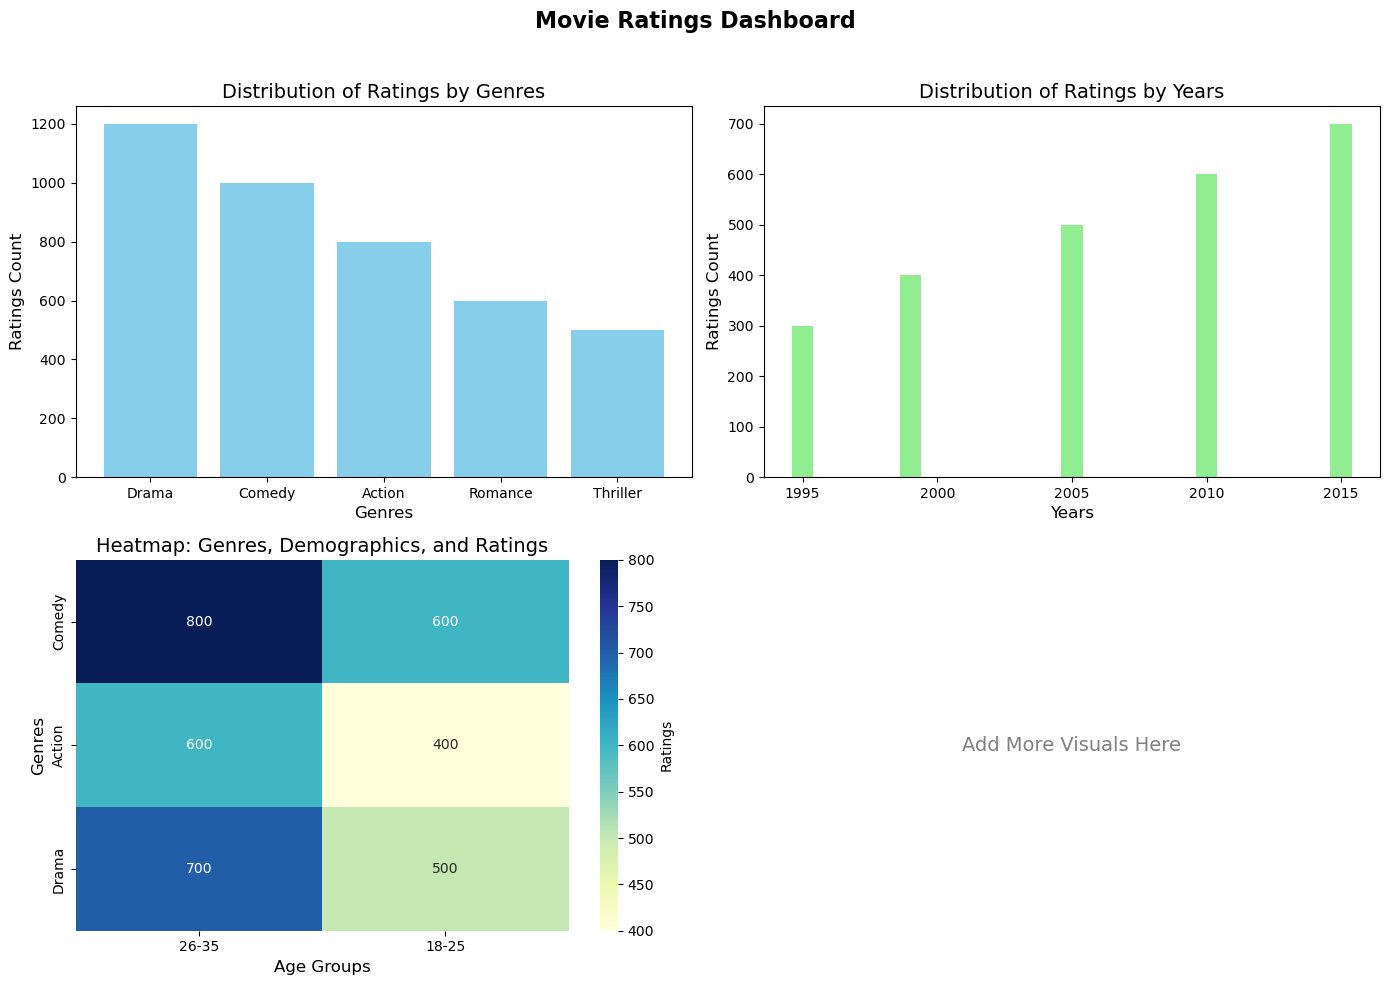

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mock data for visualization
genres_distribution = {"Drama": 1200, "Comedy": 1000, "Action": 800, "Romance": 600, "Thriller": 500}
year_distribution = {1995: 300, 1999: 400, 2005: 500, 2010: 600, 2015: 700}
heatmap_data = [
    {"genre": "Drama", "ageGroup": "18-25", "rating": 500},
    {"genre": "Drama", "ageGroup": "26-35", "rating": 700},
    {"genre": "Comedy", "ageGroup": "18-25", "rating": 600},
    {"genre": "Comedy", "ageGroup": "26-35", "rating": 800},
    {"genre": "Action", "ageGroup": "18-25", "rating": 400},
    {"genre": "Action", "ageGroup": "26-35", "rating": 600},
]

# Convert heatmap data to a matrix format
genres = list(set([d["genre"] for d in heatmap_data]))
age_groups = list(set([d["ageGroup"] for d in heatmap_data]))
heatmap_matrix = np.zeros((len(genres), len(age_groups)))

for data in heatmap_data:
    row = genres.index(data["genre"])
    col = age_groups.index(data["ageGroup"])
    heatmap_matrix[row][col] = data["rating"]

# Create the dashboard with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Movie Ratings Dashboard", fontsize=16, fontweight="bold")

# Bar chart for distribution of ratings by genres
axes[0, 0].bar(genres_distribution.keys(), genres_distribution.values(), color="skyblue")
axes[0, 0].set_title("Distribution of Ratings by Genres", fontsize=14)
axes[0, 0].set_xlabel("Genres", fontsize=12)
axes[0, 0].set_ylabel("Ratings Count", fontsize=12)

# Bar chart for distribution of ratings by years
axes[0, 1].bar(year_distribution.keys(), year_distribution.values(), color="lightgreen")
axes[0, 1].set_title("Distribution of Ratings by Years", fontsize=14)
axes[0, 1].set_xlabel("Years", fontsize=12)
axes[0, 1].set_ylabel("Ratings Count", fontsize=12)

# Heatmap for genres, demographics, and ratings
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    xticklabels=age_groups,
    yticklabels=genres,
    ax=axes[1, 0],
    cbar_kws={"label": "Ratings"},
)
axes[1, 0].set_title("Heatmap: Genres, Demographics, and Ratings", fontsize=14)
axes[1, 0].set_xlabel("Age Groups", fontsize=12)
axes[1, 0].set_ylabel("Genres", fontsize=12)

# Empty placeholder for additional visuals
axes[1, 1].text(0.5, 0.5, "Add More Visuals Here", fontsize=14, ha="center", va="center", alpha=0.5)
axes[1, 1].axis("off")

# Adjust layout and display the dashboard
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
